<a href="https://colab.research.google.com/github/hsching/Airline-Passenger-Satisfaction-Predictive-Models/blob/main/3_Decision_tree_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import file from the folder "ISOM3360" in our MyDrive, with shortcut of shared folder "ISOM3360 group project" in
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = 'train_processed (all standardization).csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
train = pd.read_csv(loc+file_name,index_col=0)
train_df = train.copy()
train_df

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_binned_long,Flight Distance_binned_middle,Flight Distance_binned_short,satisfaction_satisfied
id,,,,,,,,,,,,,,,,,,,,,
70172,-1.745279,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5047,-0.951360,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
110028,-0.885200,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
24026,-0.951360,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
119299,1.430397,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,-1.083680,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,-0.296785,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
73097,0.636478,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,1.255590,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
68825,-0.620561,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,-0.296785,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Get data ready and split the data

In [ ]:
X = train_df.iloc[:,0:26]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Build the Decision Tree model

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)

In [ ]:
# evaluate model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy score: 0.9454549829170877
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     23385
         1.0       0.94      0.94      0.94     18177

    accuracy                           0.95     41562
   macro avg       0.94      0.94      0.94     41562
weighted avg       0.95      0.95      0.95     41562

Confusion matrix:
 [[22200  1185]
 [ 1082 17095]]


# Hyper-parameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
treeObj = model.tree_
print(treeObj.node_count)
print(treeObj.max_depth)

5369
35


## criterion = default = 'gini'

In [ ]:
model_tunning = DecisionTreeClassifier(random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9454549829170877
CV Accuracy: 0.9459982291345858
CV AUC: 0.9452651131548747
Tree object node count: 5369
Confusion matrix:
 [[55980  2899]
 [ 2712 42313]]


### max_depth (create a loop to try out different depth value)

In [ ]:
# create array that hold max_depth from 0 to 35
max_depth = np.linspace(1, 35, 35, endpoint=True)
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [ ]:
# create 2 lists for training and testing set, and append the accuracy at different depth level in
train_acc = []
test_acc = []
cv_acc = []
cv_auc = []
node_count = []

# create a loop to try out all the number from 1 to 35 for max_depths in a decision tree
for i in max_depth:
  model_tunning = DecisionTreeClassifier(max_depth=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)
  cv_auc.append(tree_auc)

  treeObj = model_tunning.tree_
  node_count.append(treeObj.node_count)

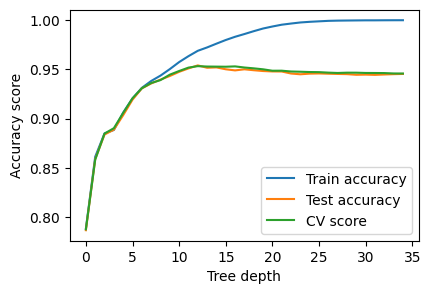

Best max_depth using validation set: 13 (Accuracy score: 0.954140801693855)
Best max_depth using CV: 13 (Accuracy score: 0.9533800431167231)
AUC when CV accuracy is the highest:  0.950675806307101
Tree object node count:  1563


In [ ]:
plt.figure(figsize=(4.5,3))
plt.plot(train_acc, label='Train accuracy')
plt.plot(test_acc, label='Test accuracy')
plt.plot(cv_acc, label='CV score')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Accuracy score')
plt.show()

#print the best max_depth
print('Best max_depth using validation set:', test_acc.index(max(test_acc))+1, '(Accuracy score:', str(max(test_acc))+')')
print('Best max_depth using CV:', cv_acc.index(max(cv_acc))+1, '(Accuracy score:', str(max(cv_acc))+')')
print('AUC when CV accuracy is the highest: ', cv_auc[cv_acc.index(max(cv_acc))])
print('Tree object node count: ', node_count[cv_acc.index(max(cv_acc))])

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.954140801693855
CV Accuracy: 0.9533800431167231
CV AUC: 0.950675806307101
Tree object node count: 1563
Confusion matrix:
 [[57169  1710]
 [ 3134 41891]]


### max_leaf_nodes

Best max_leaf_nodes using validation: 352 (Accuracy score: 0.9552475819257976)
Best max_leaf_nodes using CV: 252 (Accuracy score: 0.956151832460733)


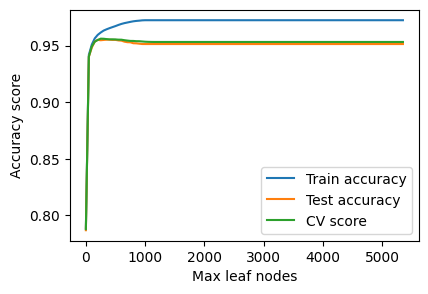

In [ ]:
max_leaf_nodes = range(2, 5371, 50)

train_acc = []
test_acc = []
cv_acc = []

for i in max_leaf_nodes:
  model_tunning = DecisionTreeClassifier(max_leaf_nodes=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  # y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  # cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(max_leaf_nodes, train_acc, label='Train accuracy')
plt.plot(max_leaf_nodes, test_acc, label='Test accuracy')
# plt.plot(max_leaf_nodes, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Max leaf nodes')
plt.ylabel('Accuracy score')
plt.show

print('Best max_leaf_nodes using validation:', max_leaf_nodes[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
# print('Best max_leaf_nodes using CV:', max_leaf_nodes[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

Best max_leaf_nodes using validation: 369 (Accuracy score: 0.9571964775516096)
Best max_leaf_nodes using CV: 375 (Accuracy score: 0.9584327841084077)
AUC when CV accuracy is the highest:  0.9557795006970837
Tree object node count:  5369


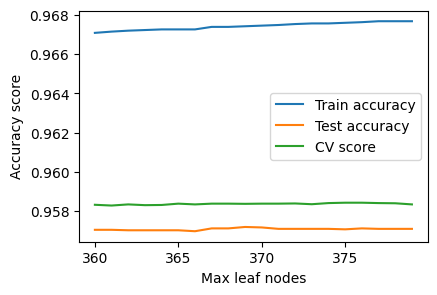

In [ ]:
max_leaf_nodes = range(360, 380)

train_acc = []
test_acc = []
cv_acc = []
cv_auc = []
node_count = []

for i in max_leaf_nodes:
  model_tunning = DecisionTreeClassifier(max_leaf_nodes=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)
  cv_auc.append(tree_auc)

  treeObj = model.tree_
  node_count.append(treeObj.node_count)

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(max_leaf_nodes, train_acc, label='Train accuracy')
plt.plot(max_leaf_nodes, test_acc, label='Test accuracy')
plt.plot(max_leaf_nodes, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Max leaf nodes')
plt.ylabel('Accuracy score')
plt.show

print('Best max_leaf_nodes using validation:', max_leaf_nodes[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best max_leaf_nodes using CV:', max_leaf_nodes[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')
print('AUC when CV accuracy is the highest: ', cv_auc[cv_acc.index(max(cv_acc))])
print('Tree object node count: ', node_count[cv_acc.index(max(cv_acc))])

In [ ]:
model_tunning = DecisionTreeClassifier(max_leaf_nodes=375, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9570761753524855
CV Accuracy: 0.9584327841084077
CV AUC: 0.9557795006970837
Tree object node count: 749
Confusion matrix:
 [[57447  1432]
 [ 2887 42138]]


### min_samples_leaf (inverse of complexity, external node)

the accuracy of validation and cv after tuning with min_samples_leaf are both reduced, so ignore this hyper-parameter

Best min_samples_leaf using validation set: 10 (Accuracy score: 0.9533708676194601)
Best min_samples_leaf using CV: 10 (Accuracy score: 0.9527929627348322)
Confusion Matrix:



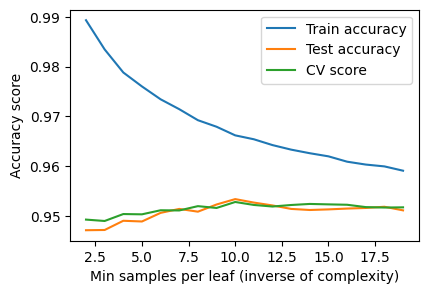

In [ ]:
min_samples_leaf = range(2, 20)
# create 2 lists for training and testing set, and append the accuracy at different min samples per leaf in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out numbers from 1 to 80 for min samples per leaf
for i in min_samples_leaf:
  model_tuning = DecisionTreeClassifier(min_samples_leaf=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_leaf, train_acc, label='Train accuracy')
plt.plot(min_samples_leaf, test_acc, label='Test accuracy')
plt.plot(min_samples_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples per leaf (inverse of complexity)')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_leaf using validation set:', min_samples_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_leaf using CV:', min_samples_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')
print('Confusion Matrix:\n')

In [ ]:
model_tunning = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9533708676194601
CV Accuracy: 0.9527929627348322
CV AUC: 0.9505471242894464
Tree object node count: 1947
Confusion matrix:
 [[56959  1920]
 [ 2985 42040]]


### min_samples_split (internal node)

Best min_samples_split using validation: 42 (Accuracy score: 0.9540686203743804)
Best min_samples_split using CV: 58 (Accuracy score: 0.9541018632583924)


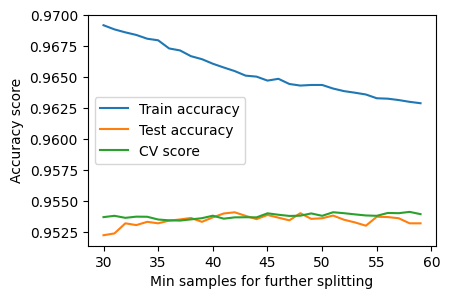

In [ ]:
min_samples_split = range(30,60)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_samples_split:
  model_tunning = DecisionTreeClassifier(min_samples_split=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_split, train_acc, label='Train accuracy')
plt.plot(min_samples_split, test_acc, label='Test accuracy')
plt.plot(min_samples_split, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_split using validation:', min_samples_split[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_split using CV:', min_samples_split[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(min_samples_split=58, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9531783841008613
CV Accuracy: 0.9541018632583924
CV AUC: 0.9517856495971716
Tree object node count: 1309
Confusion matrix:
 [[57063  1816]
 [ 2953 42072]]


### min_weight_fraction_leaf

Best min_weight_fraction_leaf using validation: 0.0 (Accuracy score: 0.9454549829170877)
Best min_weight_fraction_leaf using CV: 0.0 (Accuracy score: 0.9370957807206652)


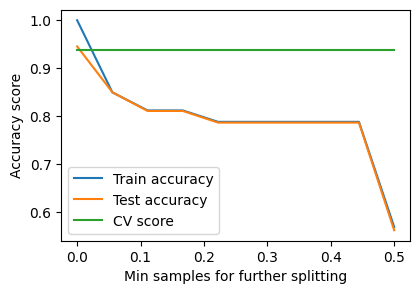

In [ ]:
min_weight_fraction_leaf = np.linspace(0.0, 0.5, 10)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_weight_fraction_leaf:
  model_tunning = DecisionTreeClassifier(min_weight_fraction_leaf=i, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_weight_fraction_leaf, train_acc, label='Train accuracy')
plt.plot(min_weight_fraction_leaf, test_acc, label='Test accuracy')
plt.plot(min_weight_fraction_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_weight_fraction_leaf using validation:', min_weight_fraction_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_weight_fraction_leaf using CV:', min_weight_fraction_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

### min_impurity_decrease

Best min_impurity_decrease using validation: 0.0 (Accuracy score: 0.9454549829170877)
Best min_impurity_decrease using CV: 0.0 (Accuracy score: 0.9370957807206652)


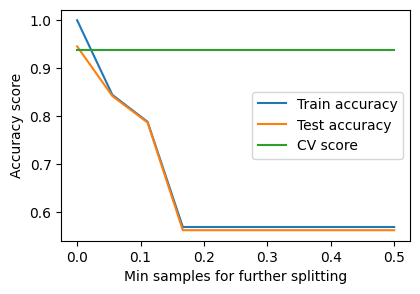

In [ ]:
min_impurity_decrease = np.linspace(0.0, 0.5, 10)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_impurity_decrease:
  model_tunning = DecisionTreeClassifier(min_impurity_decrease=i, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_impurity_decrease, train_acc, label='Train accuracy')
plt.plot(min_impurity_decrease, test_acc, label='Test accuracy')
plt.plot(min_impurity_decrease, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_impurity_decrease using validation:', min_impurity_decrease[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_impurity_decrease using CV:', min_impurity_decrease[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

### max_depth + max_leaf_nodes

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, max_leaf_nodes=375, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.955343823685097
CV Accuracy: 0.9549391746227287
CV AUC: 0.9520070888754348
Tree object node count: 749
Confusion matrix:
 [[57348  1531]
 [ 3151 41874]]


### max_depth + max_leaf_nodes + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, max_leaf_nodes=375, min_samples_split=58, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9533708676194601
CV Accuracy: 0.953264551894056
CV AUC: 0.9502472836965379
Tree object node count: 745
Confusion matrix:
 [[57282  1597]
 [ 3259 41766]]


### max_leaf_nodes + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(max_leaf_nodes=375, min_samples_split=58, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9536595928973581
CV Accuracy: 0.9557668617185094
CV AUC: 0.953084922494989
Tree object node count: 749
Confusion matrix:
 [[57301  1578]
 [ 3018 42007]]


### max_leaf_nodes + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(max_leaf_nodes=375, min_samples_split=58, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9532986862999856
CV Accuracy: 0.9536495226362797
CV AUC: 0.9509710669767892
Tree object node count: 749
Confusion matrix:
 [[57175  1704]
 [ 3112 41913]]


### min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(min_samples_split=58, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9529137192627881
CV Accuracy: 0.9531394364028334
CV AUC: 0.9506333482329052
Tree object node count: 1121
Confusion matrix:
 [[57079  1800]
 [ 3069 41956]]


### max_depth + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, min_samples_split=58, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.953539290698234
CV Accuracy: 0.9532068062827225
CV AUC: 0.9501884928952863
Tree object node count: 743
Confusion matrix:
 [[57279  1600]
 [ 3262 41763]]


### max_depth + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9534189884991098
CV Accuracy: 0.9533415460425008
CV AUC: 0.9504040599209671
Tree object node count: 1051
Confusion matrix:
 [[57256  1623]
 [ 3225 41800]]


### max_leaf_nodes + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(max_leaf_nodes=375, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9554641258842211
CV Accuracy: 0.9556609947643979
CV AUC: 0.9529679940355944
Tree object node count: 749
Confusion matrix:
 [[57299  1580]
 [ 3027 41998]]


### max_depth + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, min_samples_split=58, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9532265049805111
CV Accuracy: 0.9524464890668309
CV AUC: 0.9493791391918974
Tree object node count: 711
Confusion matrix:
 [[57253  1626]
 [ 3315 41710]]


### max_depth + max_leaf_nodes + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, max_leaf_nodes=375, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.953539290698234
CV Accuracy: 0.9533992916538343
CV AUC: 0.95040797877962
Tree object node count: 749
Confusion matrix:
 [[57280  1599]
 [ 3243 41782]]


### max_depth + max_leaf_nodes + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(max_depth=13, max_leaf_nodes=375, min_samples_split=58, min_samples_leaf=10, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9531783841008613
CV Accuracy: 0.9524561133353865
CV AUC: 0.9493876311839491
Tree object node count: 711
Confusion matrix:
 [[57254  1625]
 [ 3315 41710]]


## criterion = 'entropy'

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9475723016216736
CV Accuracy: 0.9478075916230366
CV AUC: 0.9471751616182631
Tree object node count: 4853
Confusion matrix:
 [[56048  2831]
 [ 2592 42433]]


### max_depth (create a loop to try out different depth value)

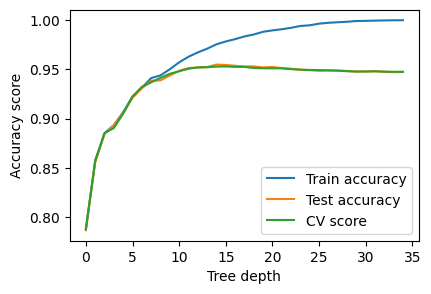

Best max_depth using validation set: 15 (Accuracy score: 0.9549347962080746)
Best max_depth using CV: 16 (Accuracy score: 0.9530143209116108)


In [ ]:
# create array that hold max_depth from 0 to 35
max_depth = np.linspace(1, 35, 35, endpoint=True)

# create 2 lists for training and testing set, and append the accuracy at different depth level in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out all the number from 1 to 35 for max_depths in a decision tree
for i in max_depth:
  model_tuning = DecisionTreeClassifier(criterion='entropy', max_depth=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))


plt.figure(figsize=(4.5,3))
plt.plot(train_acc, label='Train accuracy')
plt.plot(test_acc, label='Test accuracy')
plt.plot(cv_acc, label='CV score')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Accuracy score')
plt.show()

#print the best max_depth
print('Best max_depth using validation set:', test_acc.index(max(test_acc))+1, '(Accuracy score:', str(max(test_acc))+')')
print('Best max_depth using CV:', cv_acc.index(max(cv_acc))+1, '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9545257687310524
CV Accuracy: 0.9530143209116108
CV AUC: 0.9507685696031064
Tree object node count: 2237
Confusion matrix:
 [[56972  1907]
 [ 2975 42050]]


### max_leaf_nodes

Best max_leaf_nodes using validation: 420 (Accuracy score: 0.9593378566960205)
Best max_leaf_nodes using CV: 440 (Accuracy score: 0.9592027255928549)
AUC when CV accuracy is the highest:  0.9562811794851692
Tree object node count:  5369


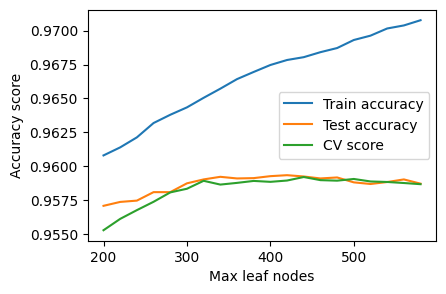

In [ ]:
max_leaf_nodes = range(200, 600, 20)

train_acc = []
test_acc = []
cv_acc = []
cv_auc = []
node_count = []

for i in max_leaf_nodes:
  model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)
  cv_auc.append(tree_auc)

  treeObj = model.tree_
  node_count.append(treeObj.node_count)

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(max_leaf_nodes, train_acc, label='Train accuracy')
plt.plot(max_leaf_nodes, test_acc, label='Test accuracy')
plt.plot(max_leaf_nodes, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Max leaf nodes')
plt.ylabel('Accuracy score')
plt.show

print('Best max_leaf_nodes using validation:', max_leaf_nodes[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best max_leaf_nodes using CV:', max_leaf_nodes[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')
print('AUC when CV accuracy is the highest: ', cv_auc[cv_acc.index(max(cv_acc))])
print('Tree object node count: ', node_count[cv_acc.index(max(cv_acc))])

Best max_leaf_nodes using validation: 416 (Accuracy score: 0.9593378566960205)
Best max_leaf_nodes using CV: 440 (Accuracy score: 0.9592027255928549)
AUC when CV accuracy is the highest:  0.9562811794851692
Tree object node count:  879


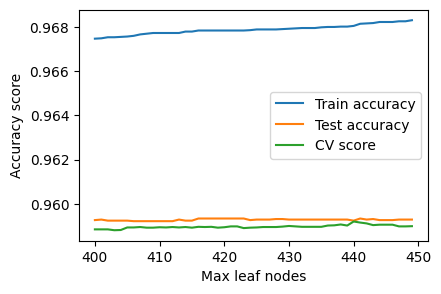

In [ ]:
max_leaf_nodes = range(400, 450)

train_acc = []
test_acc = []
cv_acc = []
cv_auc = []
node_count = []

for i in max_leaf_nodes:
  model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)
  cv_auc.append(tree_auc)

  treeObj = model_tunning.tree_
  node_count.append(treeObj.node_count)

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(max_leaf_nodes, train_acc, label='Train accuracy')
plt.plot(max_leaf_nodes, test_acc, label='Test accuracy')
plt.plot(max_leaf_nodes, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Max leaf nodes')
plt.ylabel('Accuracy score')
plt.show

print('Best max_leaf_nodes using validation:', max_leaf_nodes[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best max_leaf_nodes using CV:', max_leaf_nodes[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')
print('AUC when CV accuracy is the highest: ', cv_auc[cv_acc.index(max(cv_acc))])
print('Tree object node count: ', node_count[cv_acc.index(max(cv_acc))])

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.959241614936721
CV Accuracy: 0.9592027255928549
CV AUC: 0.9562811794851692
Tree object node count: 879
Confusion matrix:
 [[57595  1284]
 [ 2955 42070]]


### min_samples_leaf (inverse of complexity, external node)

the accuracy of validation and cv after tuning with min_samples_leaf are both reduced, so ignore this hyper-parameter

Best min_samples_leaf using validation set: 12 (Accuracy score: 0.9541167412540301)
Best min_samples_leaf using CV: 12 (Accuracy score: 0.9528988296889437)


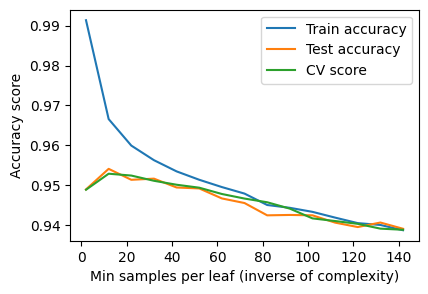

In [ ]:
min_samples_leaf = range(2, 150, 10)
# create 2 lists for training and testing set, and append the accuracy at different min samples per leaf in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out numbers from 1 to 80 for min samples per leaf
for i in min_samples_leaf:
  model_tuning = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_leaf, train_acc, label='Train accuracy')
plt.plot(min_samples_leaf, test_acc, label='Test accuracy')
plt.plot(min_samples_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples per leaf (inverse of complexity)')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_leaf using validation set:', min_samples_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_leaf using CV:', min_samples_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

Best min_samples_leaf using validation set: 12 (Accuracy score: 0.9541167412540301)
Best min_samples_leaf using CV: 15 (Accuracy score: 0.9534666615337234)


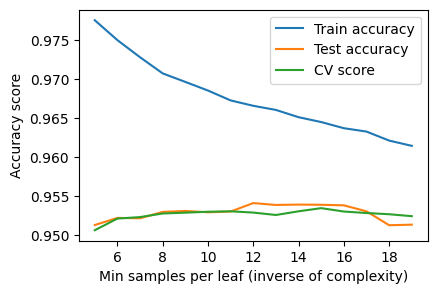

In [ ]:
min_samples_leaf = range(5, 20)
# create 2 lists for training and testing set, and append the accuracy at different min samples per leaf in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out numbers from 1 to 80 for min samples per leaf
for i in min_samples_leaf:
  model_tuning = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_leaf, train_acc, label='Train accuracy')
plt.plot(min_samples_leaf, test_acc, label='Test accuracy')
plt.plot(min_samples_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples per leaf (inverse of complexity)')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_leaf using validation set:', min_samples_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_leaf using CV:', min_samples_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9541167412540301
CV Accuracy: 0.9528988296889437
CV AUC: 0.9507581189361529
Tree object node count: 1613
Confusion matrix:
 [[56925  1954]
 [ 2940 42085]]


### min_samples_split (internal node)

Best min_samples_split using validation: 73 (Accuracy score: 0.9554641258842211)
Best min_samples_split using CV: 93 (Accuracy score: 0.9545927009547275)


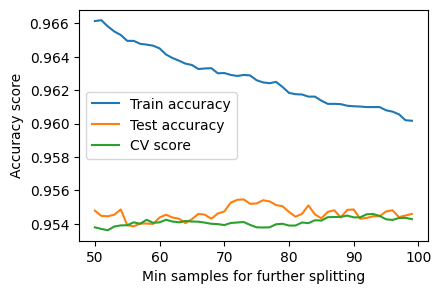

In [ ]:
min_samples_split = range(50, 100)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_samples_split:
  model_tunning = DecisionTreeClassifier(criterion='entropy', min_samples_split=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_split, train_acc, label='Train accuracy')
plt.plot(min_samples_split, test_acc, label='Test accuracy')
plt.plot(min_samples_split, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_split using validation:', min_samples_split[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_split using CV:', min_samples_split[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9544535874115779
CV Accuracy: 0.9545927009547275
CV AUC: 0.9523938088181846
Tree object node count: 821
Confusion matrix:
 [[57047  1832]
 [ 2886 42139]]


### min_weight_fraction_leaf

Best min_weight_fraction_leaf using validation: 0.0 (Accuracy score: 0.9475723016216736)
Best min_weight_fraction_leaf using CV: 0.0 (Accuracy score: 0.9478075916230366)


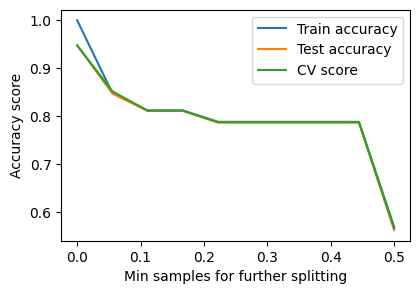

In [ ]:
min_weight_fraction_leaf = np.linspace(0.0, 0.5, 10)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_weight_fraction_leaf:
  model_tunning = DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=i, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_weight_fraction_leaf, train_acc, label='Train accuracy')
plt.plot(min_weight_fraction_leaf, test_acc, label='Test accuracy')
plt.plot(min_weight_fraction_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_weight_fraction_leaf using validation:', min_weight_fraction_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_weight_fraction_leaf using CV:', min_weight_fraction_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

### min_impurity_decrease

Best min_impurity_decrease using validation: 0.0 (Accuracy score: 0.9475723016216736)
Best min_impurity_decrease using CV: 0.0 (Accuracy score: 0.9478075916230366)


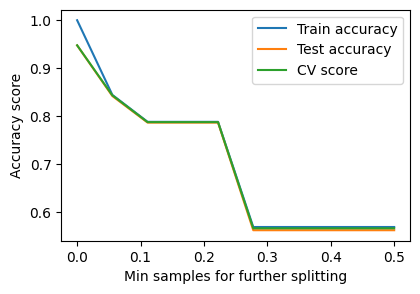

In [ ]:
min_impurity_decrease = np.linspace(0.0, 0.5, 10)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_impurity_decrease:
  model_tunning = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=i, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_impurity_decrease, train_acc, label='Train accuracy')
plt.plot(min_impurity_decrease, test_acc, label='Test accuracy')
plt.plot(min_impurity_decrease, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_impurity_decrease using validation:', min_impurity_decrease[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_impurity_decrease using CV:', min_impurity_decrease[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

### max_depth + max_leaf_nodes

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=440, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9584716808623261
CV Accuracy: 0.9566137973514013
CV AUC: 0.9538165400976352
Tree object node count: 879
Confusion matrix:
 [[57395  1484]
 [ 3024 42001]]


### max_depth + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9549107357682498
CV Accuracy: 0.9537746381275023
CV AUC: 0.9514551146730599
Tree object node count: 647
Confusion matrix:
 [[57045  1834]
 [ 2969 42056]]


### max_depth + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9558731533612435
CV Accuracy: 0.9527255928549431
CV AUC: 0.9503230645172895
Tree object node count: 1157
Confusion matrix:
 [[57015  1864]
 [ 3048 41977]]


### max_leaf_nodes + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.954285164332804
CV Accuracy: 0.9555166307360641
CV AUC: 0.9529451321407245
Tree object node count: 821
Confusion matrix:
 [[57244  1635]
 [ 2987 42038]]


### max_leaf_nodes + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9567633896347625
CV Accuracy: 0.9559882198952879
CV AUC: 0.9532593347149928
Tree object node count: 879
Confusion matrix:
 [[57332  1547]
 [ 3026 41999]]


### min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', min_samples_split=93, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9526490544247149
CV Accuracy: 0.9536687711733908
CV AUC: 0.9514270265016824
Tree object node count: 733
Confusion matrix:
 [[57009  1870]
 [ 2944 42081]]


### max_depth + max_leaf_nodes + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=440, min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9545979500505269
CV Accuracy: 0.9537650138589467
CV AUC: 0.9514440097313608
Tree object node count: 645
Confusion matrix:
 [[57045  1834]
 [ 2970 42055]]


### max_leaf_nodes + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, min_samples_split=93, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9526490544247149
CV Accuracy: 0.9541018632583924
CV AUC: 0.9516732927623266
Tree object node count: 733
Confusion matrix:
 [[57106  1773]
 [ 2996 42029]]


### max_depth + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_split=93, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9536114720177085
CV Accuracy: 0.9528988296889437
CV AUC: 0.9506144067055373
Tree object node count: 595
Confusion matrix:
 [[56980  1899]
 [ 2995 42030]]


### max_depth + max_leaf_nodes + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=440, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9569799335931861
CV Accuracy: 0.9543617185093933
CV AUC: 0.9516334427340183
Tree object node count: 879
Confusion matrix:
 [[57236  1643]
 [ 3099 41926]]


### max_depth + max_leaf_nodes + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=440, min_samples_split=93, min_samples_leaf=12, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9536114720177085
CV Accuracy: 0.9528218355404989
CV AUC: 0.9505412448698302
Tree object node count: 595
Confusion matrix:
 [[56974  1905]
 [ 2997 42028]]


## criterion = 'log_loss'

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9475723016216736
CV Accuracy: 0.9478075916230366
CV AUC: 0.9471751616182631
Tree object node count: 4853
Confusion matrix:
 [[56048  2831]
 [ 2592 42433]]


### max_depth (create a loop to try out different depth value)

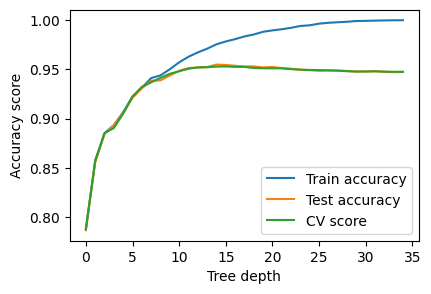

Best max_depth using validation set: 15 (Accuracy score: 0.9549347962080746)
Best max_depth using CV: 16 (Accuracy score: 0.9530143209116108)


In [ ]:
# create array that hold max_depth from 0 to 35
max_depth = np.linspace(1, 35, 35, endpoint=True)

# create 2 lists for training and testing set, and append the accuracy at different depth level in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out all the number from 1 to 35 for max_depths in a decision tree
for i in max_depth:
  model_tuning = DecisionTreeClassifier(criterion='log_loss', max_depth=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))


plt.figure(figsize=(4.5,3))
plt.plot(train_acc, label='Train accuracy')
plt.plot(test_acc, label='Test accuracy')
plt.plot(cv_acc, label='CV score')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Accuracy score')
plt.show()

#print the best max_depth
print('Best max_depth using validation set:', test_acc.index(max(test_acc))+1, '(Accuracy score:', str(max(test_acc))+')')
print('Best max_depth using CV:', cv_acc.index(max(cv_acc))+1, '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9545257687310524
CV Accuracy: 0.9530143209116108
CV AUC: 0.9507685696031064
Tree object node count: 2237
Confusion matrix:
 [[56972  1907]
 [ 2975 42050]]


### max_leaf_nodes

Best max_leaf_nodes using validation: 420 (Accuracy score: 0.9593378566960205)
Best max_leaf_nodes using CV: 440 (Accuracy score: 0.9592027255928549)
AUC when CV accuracy is the highest:  0.9562811794851692
Tree object node count:  5369


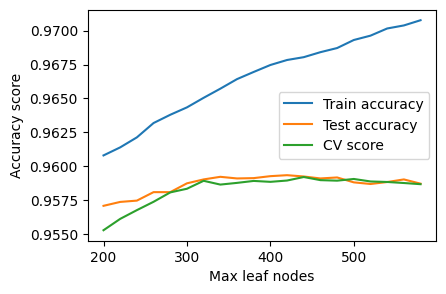

In [ ]:
max_leaf_nodes = range(200, 600, 20)

train_acc = []
test_acc = []
cv_acc = []
cv_auc = []
node_count = []

for i in max_leaf_nodes:
  model_tunning = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)
  cv_auc.append(tree_auc)

  treeObj = model.tree_
  node_count.append(treeObj.node_count)

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(max_leaf_nodes, train_acc, label='Train accuracy')
plt.plot(max_leaf_nodes, test_acc, label='Test accuracy')
plt.plot(max_leaf_nodes, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Max leaf nodes')
plt.ylabel('Accuracy score')
plt.show

print('Best max_leaf_nodes using validation:', max_leaf_nodes[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best max_leaf_nodes using CV:', max_leaf_nodes[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')
print('AUC when CV accuracy is the highest: ', cv_auc[cv_acc.index(max(cv_acc))])
print('Tree object node count: ', node_count[cv_acc.index(max(cv_acc))])

Best max_leaf_nodes using validation: 416 (Accuracy score: 0.9593378566960205)
Best max_leaf_nodes using CV: 440 (Accuracy score: 0.9592027255928549)
AUC when CV accuracy is the highest:  0.9562811794851692
Tree object node count:  879


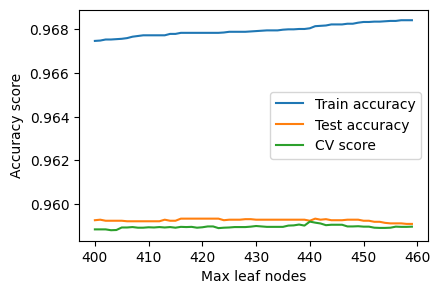

In [ ]:
max_leaf_nodes = range(400, 460)

train_acc = []
test_acc = []
cv_acc = []
cv_auc = []
node_count = []

for i in max_leaf_nodes:
  model_tunning = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)
  cv_auc.append(tree_auc)

  treeObj = model_tunning.tree_
  node_count.append(treeObj.node_count)

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(max_leaf_nodes, train_acc, label='Train accuracy')
plt.plot(max_leaf_nodes, test_acc, label='Test accuracy')
plt.plot(max_leaf_nodes, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Max leaf nodes')
plt.ylabel('Accuracy score')
plt.show

print('Best max_leaf_nodes using validation:', max_leaf_nodes[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best max_leaf_nodes using CV:', max_leaf_nodes[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')
print('AUC when CV accuracy is the highest: ', cv_auc[cv_acc.index(max(cv_acc))])
print('Tree object node count: ', node_count[cv_acc.index(max(cv_acc))])

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=440, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.959241614936721
CV Accuracy: 0.9592027255928549
CV AUC: 0.9562811794851692
Tree object node count: 879
Confusion matrix:
 [[57595  1284]
 [ 2955 42070]]


### min_samples_leaf (inverse of complexity, external node)

the accuracy of validation and cv after tuning with min_samples_leaf are both reduced, so ignore this hyper-parameter

Best min_samples_leaf using validation set: 12 (Accuracy score: 0.9541167412540301)
Best min_samples_leaf using CV: 12 (Accuracy score: 0.9528988296889437)


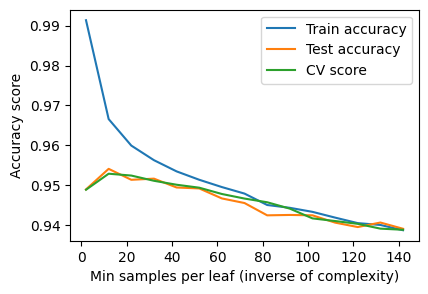

In [ ]:
min_samples_leaf = range(2, 150, 10)
# create 2 lists for training and testing set, and append the accuracy at different min samples per leaf in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out numbers from 1 to 80 for min samples per leaf
for i in min_samples_leaf:
  model_tuning = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_leaf, train_acc, label='Train accuracy')
plt.plot(min_samples_leaf, test_acc, label='Test accuracy')
plt.plot(min_samples_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples per leaf (inverse of complexity)')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_leaf using validation set:', min_samples_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_leaf using CV:', min_samples_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

Best min_samples_leaf using validation set: 12 (Accuracy score: 0.9541167412540301)
Best min_samples_leaf using CV: 15 (Accuracy score: 0.9534666615337234)


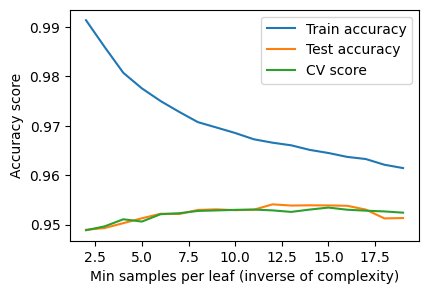

In [ ]:
min_samples_leaf = range(2, 20)
# create 2 lists for training and testing set, and append the accuracy at different min samples per leaf in
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out numbers from 1 to 80 for min samples per leaf
for i in min_samples_leaf:
  model_tuning = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=int(i), random_state=42)
  model_tuning.fit(X_train, y_train)

  y_pred_train = model_tuning.predict(X_train)
  y_pred_test = model_tuning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tuning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_leaf, train_acc, label='Train accuracy')
plt.plot(min_samples_leaf, test_acc, label='Test accuracy')
plt.plot(min_samples_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples per leaf (inverse of complexity)')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_leaf using validation set:', min_samples_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_leaf using CV:', min_samples_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9539001972956066
CV Accuracy: 0.9534666615337234
CV AUC: 0.9512695982657816
Tree object node count: 1385
Confusion matrix:
 [[56980  1899]
 [ 2936 42089]]


### min_samples_split (internal node)

Best min_samples_split using validation: 73 (Accuracy score: 0.9554641258842211)
Best min_samples_split using CV: 93 (Accuracy score: 0.9545927009547275)


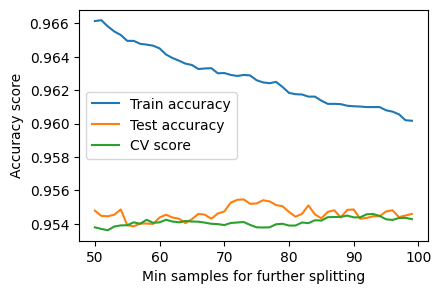

In [ ]:
min_samples_split = range(50, 100)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_samples_split:
  model_tunning = DecisionTreeClassifier(criterion='log_loss', min_samples_split=int(i), random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_samples_split, train_acc, label='Train accuracy')
plt.plot(min_samples_split, test_acc, label='Test accuracy')
plt.plot(min_samples_split, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_samples_split using validation:', min_samples_split[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_samples_split using CV:', min_samples_split[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9544535874115779
CV Accuracy: 0.9545927009547275
CV AUC: 0.9523938088181846
Tree object node count: 821
Confusion matrix:
 [[57047  1832]
 [ 2886 42139]]


### min_weight_fraction_leaf

Best min_weight_fraction_leaf using validation: 0.0 (Accuracy score: 0.9475723016216736)
Best min_weight_fraction_leaf using CV: 0.0 (Accuracy score: 0.9478075916230366)


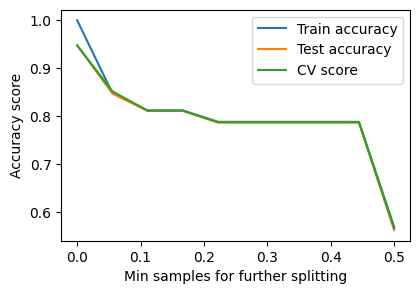

In [ ]:
min_weight_fraction_leaf = np.linspace(0.0, 0.5, 10)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_weight_fraction_leaf:
  model_tunning = DecisionTreeClassifier(criterion='log_loss', min_weight_fraction_leaf=i, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_weight_fraction_leaf, train_acc, label='Train accuracy')
plt.plot(min_weight_fraction_leaf, test_acc, label='Test accuracy')
plt.plot(min_weight_fraction_leaf, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_weight_fraction_leaf using validation:', min_weight_fraction_leaf[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_weight_fraction_leaf using CV:', min_weight_fraction_leaf[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

### min_impurity_decrease

Best min_impurity_decrease using validation: 0.0 (Accuracy score: 0.9475723016216736)
Best min_impurity_decrease using CV: 0.0 (Accuracy score: 0.9478075916230366)


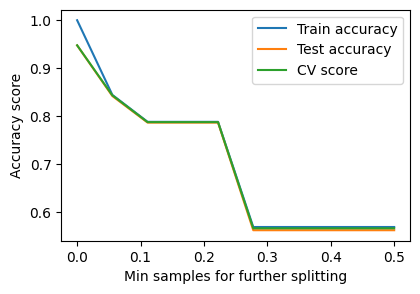

In [ ]:
min_impurity_decrease = np.linspace(0.0, 0.5, 10)

# create 2 lists to store the accuracy at different min samples for further splitting
train_acc = []
test_acc = []
cv_acc = []

# create a loop to try out different min samples for further splitting
for i in min_impurity_decrease:
  model_tunning = DecisionTreeClassifier(criterion='log_loss', min_impurity_decrease=i, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_train = model_tunning.predict(X_train)
  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  train_acc.append(accuracy_score(y_train, y_pred_train))
  test_acc.append(accuracy_score(y_test, y_pred_test))
  cv_acc.append(accuracy_score(y, y_pred_cv))

# visualize
plt.figure(figsize=(4.5,3))
plt.plot(min_impurity_decrease, train_acc, label='Train accuracy')
plt.plot(min_impurity_decrease, test_acc, label='Test accuracy')
plt.plot(min_impurity_decrease, cv_acc, label='CV score')
plt.legend()
plt.xlabel('Min samples for further splitting')
plt.ylabel('Accuracy score')
plt.show

print('Best min_impurity_decrease using validation:', min_impurity_decrease[test_acc.index(max(test_acc))], '(Accuracy score:', str(max(test_acc))+')')
print('Best min_impurity_decrease using CV:', min_impurity_decrease[cv_acc.index(max(cv_acc))], '(Accuracy score:', str(max(cv_acc))+')')

### max_depth + max_leaf_nodes

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, max_leaf_nodes=440, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9584716808623261
CV Accuracy: 0.9566137973514013
CV AUC: 0.9538165400976352
Tree object node count: 879
Confusion matrix:
 [[57395  1484]
 [ 3024 42001]]


### max_depth + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9549107357682498
CV Accuracy: 0.9537746381275023
CV AUC: 0.9514551146730599
Tree object node count: 647
Confusion matrix:
 [[57045  1834]
 [ 2969 42056]]


### max_depth + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9556566094028199
CV Accuracy: 0.9528603326147213
CV AUC: 0.950355725067641
Tree object node count: 1037
Confusion matrix:
 [[57062  1817]
 [ 3081 41944]]


### max_leaf_nodes + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=440, min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.954285164332804
CV Accuracy: 0.9555166307360641
CV AUC: 0.9529451321407245
Tree object node count: 821
Confusion matrix:
 [[57244  1635]
 [ 2987 42038]]


### max_leaf_nodes + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=440, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9560415764400173
CV Accuracy: 0.9554203880505081
CV AUC: 0.9528236309251437
Tree object node count: 879
Confusion matrix:
 [[57248  1631]
 [ 3001 42024]]


### min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', min_samples_split=93, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9523122082671671
CV Accuracy: 0.9537650138589467
CV AUC: 0.9514335579327706
Tree object node count: 723
Confusion matrix:
 [[57049  1830]
 [ 2974 42051]]


### max_depth + max_leaf_nodes + min_samples_split

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, max_leaf_nodes=440, min_samples_split=93, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9545979500505269
CV Accuracy: 0.9537650138589467
CV AUC: 0.9514440097313608
Tree object node count: 645
Confusion matrix:
 [[57045  1834]
 [ 2970 42055]]


### max_leaf_nodes + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=440, min_samples_split=93, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9523122082671671
CV Accuracy: 0.9539574992300586
CV AUC: 0.9515067186368409
Tree object node count: 723
Confusion matrix:
 [[57106  1773]
 [ 3011 42014]]


### max_depth + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, min_samples_split=93, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9531302632212116
CV Accuracy: 0.9527544656606098
CV AUC: 0.9503929606374526
Tree object node count: 591
Confusion matrix:
 [[57001  1878]
 [ 3031 41994]]


### max_depth + max_leaf_nodes + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, max_leaf_nodes=440, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9557769116019441
CV Accuracy: 0.954178857406837
CV AUC: 0.9515086761801057
Tree object node count: 879
Confusion matrix:
 [[57203  1676]
 [ 3085 41940]]


### max_depth + max_leaf_nodes + min_samples_split + min_samples_leaf

In [ ]:
model_tunning = DecisionTreeClassifier(criterion='log_loss', max_depth=16, max_leaf_nodes=440, min_samples_split=93, min_samples_leaf=15, random_state=42)
model_tunning.fit(X_train, y_train)

y_pred_test = model_tunning.predict(X_test)
y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
tree_auc = auc(tree_fpr, tree_tpr)

print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
print('CV Accuracy:', accuracy_score(y, y_pred_cv))
print('CV AUC:', tree_auc)
print('Tree object node count:', model_tunning.tree_.node_count)
print('Confusion matrix:\n', confusion_matrix(y, y_pred_cv))

Simple Accuracy: 0.9531302632212116
CV Accuracy: 0.952773714197721
CV AUC: 0.9504125575712031
Tree object node count: 591
Confusion matrix:
 [[57002  1877]
 [ 3030 41995]]


# Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
# make array for hyper-parameters to choose from
depths = np.arange(13, 16)
num_leafs = np.arange(375, 440)
samples_leaf = np.arange(10, 12)
samples_split = np.arange(58, 93)

try_grid = [{'max_depth':depths,
             'max_leaf_nodes':num_leafs,
             'min_samples_leaf':samples_leaf,
             'min_samples_split':samples_split}]

DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=5)
DTM.fit(X_train, y_train)
print(DTM.best_params_)
print(DTM.best_score_)